Optimización usando ridge regression
===

* 34:40 min | Ultima modificación: Marzo 30, 2021 | [YouTube](https://youtu.be/-wmu_R_6KW0)

**Preparación**

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Función a aproximar usando un modelo de regresión

$$
f(\mathbf{x})=
\begin{cases}
    \exp \; (0.15 \cdot x + 1) + 0 \cdot y + 0 \cdot z & \text{si } x \lt 5 \\ \\
    \exp\; (0.25 \cdot x + 1) + 0 \cdot y + 0 \cdot z & \text{de lo contrario}
\end{cases}
$$

con $\mathbf{x}=[x, y, z]'$.

In [2]:
def f(x):
    return math.exp(0.15 * x[0] + 1) if x[0] < 5 else math.exp(0.25 * x[0] + 1)

## Generación de la muestra de datos

In [3]:
#
# Semilla del generador de aleatorios
#
np.random.seed(1234)

#
# Datos para entrenamiento del modelo
#
def create_data(n):
    x = np.linspace(start=0, stop=10, num=n)
    y = np.random.uniform(low=0, high=1, size=(n, 1))
    z = np.random.uniform(low=0, high=1, size=(n, 1))
    return np.column_stack((x, y, z))


X_data = create_data(n=20)
X_data

array([[ 0.        ,  0.19151945,  0.36488598],
       [ 0.52631579,  0.62210877,  0.61539618],
       [ 1.05263158,  0.43772774,  0.07538124],
       [ 1.57894737,  0.78535858,  0.36882401],
       [ 2.10526316,  0.77997581,  0.9331401 ],
       [ 2.63157895,  0.27259261,  0.65137814],
       [ 3.15789474,  0.27646426,  0.39720258],
       [ 3.68421053,  0.80187218,  0.78873014],
       [ 4.21052632,  0.95813935,  0.31683612],
       [ 4.73684211,  0.87593263,  0.56809865],
       [ 5.26315789,  0.35781727,  0.86912739],
       [ 5.78947368,  0.50099513,  0.43617342],
       [ 6.31578947,  0.68346294,  0.80214764],
       [ 6.84210526,  0.71270203,  0.14376682],
       [ 7.36842105,  0.37025075,  0.70426097],
       [ 7.89473684,  0.56119619,  0.70458131],
       [ 8.42105263,  0.50308317,  0.21879211],
       [ 8.94736842,  0.01376845,  0.92486763],
       [ 9.47368421,  0.77282662,  0.44214076],
       [10.        ,  0.88264119,  0.90931596]])

In [4]:
d_data = np.apply_along_axis(f, 1, X_data)
d_data

array([ 2.71828183,  2.94158152,  3.18322469,  3.44471821,  3.72769274,
        4.03391288,  4.36528819,  4.72388512,  5.11193983,  5.53187222,
       10.13291944, 11.55789116, 13.18325374, 15.03718774, 17.15183668,
       19.56386438, 22.31509059, 25.45321612, 29.03264982, 33.11545196])

In [5]:
X_real = create_data(n=100)
X_real

array([[0.00000000e+00, 5.98092228e-02, 9.34857450e-03],
       [1.01010101e-01, 1.84287084e-01, 9.00648621e-01],
       [2.02020202e-01, 4.73552788e-02, 9.77241431e-01],
       [3.03030303e-01, 6.74880944e-01, 5.56894679e-01],
       [4.04040404e-01, 5.94624780e-01, 8.47738434e-02],
       [5.05050505e-01, 5.33310163e-01, 3.33002466e-01],
       [6.06060606e-01, 4.33240627e-02, 7.28428676e-01],
       [7.07070707e-01, 5.61433080e-01, 1.42435373e-01],
       [8.08080808e-01, 3.29668446e-01, 5.52468939e-01],
       [9.09090909e-01, 5.02966833e-01, 2.73043260e-01],
       [1.01010101e+00, 1.11894318e-01, 9.74495138e-01],
       [1.11111111e+00, 6.07193706e-01, 6.67786906e-01],
       [1.21212121e+00, 5.65944643e-01, 2.55653286e-01],
       [1.31313131e+00, 6.76406199e-03, 1.08311494e-01],
       [1.41414141e+00, 6.17441709e-01, 7.76180723e-01],
       [1.51515152e+00, 9.12122886e-01, 7.82477993e-01],
       [1.61616162e+00, 7.90524133e-01, 7.61603914e-01],
       [1.71717172e+00, 9.92081

In [6]:
d_real = np.apply_along_axis(f, 1, X_real)
d_real

array([ 2.71828183,  2.75978151,  2.80191477,  2.84469127,  2.88812084,
        2.93221343,  2.97697919,  3.02242838,  3.06857143,  3.11541895,
        3.16298168,  3.21127054,  3.26029663,  3.31007119,  3.36060565,
        3.41191162,  3.46400087,  3.51688536,  3.57057723,  3.62508881,
        3.68043261,  3.73662134,  3.79366789,  3.85158537,  3.91038707,
        3.97008648,  4.03069732,  4.0922335 ,  4.15470914,  4.21813859,
        4.28253642,  4.34791739,  4.41429653,  4.48168907,  4.55011049,
        4.61957648,  4.69010301,  4.76170625,  4.83440266,  4.90820891,
        4.98314195,  5.05921899,  5.13645748,  5.21487517,  5.29449005,
        5.3753204 ,  5.45738478,  5.54070203,  5.62529127,  5.71117192,
        9.60828995,  9.85401304, 10.10602028, 10.36447236, 10.62953411,
       10.90137457, 11.1801671 , 11.46608949, 11.75932408, 12.06005787,
       12.36848265, 12.68479511, 13.00919696, 13.34189509, 13.68310166,
       14.03303428, 14.3919161 , 14.75997598, 15.13744866, 15.52

## Gráfica de la función

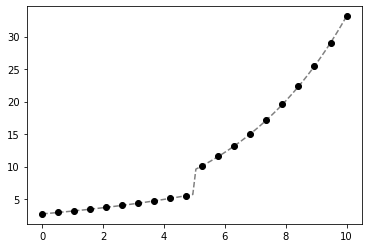

In [7]:
plt.plot(X_real[:, 0], d_real, "--", color="gray")
plt.plot(X_data[:, 0], d_data, "o", color="black")
plt.show()

## Partición del conjunto de datos

In [8]:
# selecciona aleatoriamente 15 elementos del conjunto de datos
index_fit = sorted(np.random.choice(len(X_data), 15, replace=False))
index_fit

[0, 2, 3, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19]

In [9]:
index_test = [i for i in range(len(X_data)) if i not in index_fit]
index_test

[1, 4, 5, 9, 12]

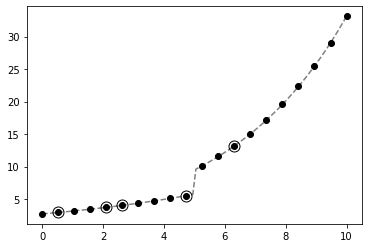

In [10]:
# muestra usada para estimar los parámetros del modelo
X_fit = X_data[index_fit, :]
d_fit = d_data[index_fit]

# muestra usada para evaluar la generalización
X_test = X_data[index_test, :]
d_test = d_data[index_test]

# grafica
plt.plot(X_real[:, 0], d_real, "--", color="gray")
plt.plot(X_data[:, 0], d_data, "o", color="black")
plt.plot(X_test[:, 0], d_test, "o", color="black", fillstyle="none", markersize=11)
plt.show()

## Modelo de regresión

$$g(\mathbf{x}) = \exp(w_0 + w_1 x + w_2 y + w_3 z)$$

In [11]:
def g(w, x):
    return math.exp(w[0] + w[1] * x[0] + w[2] * x[1] + w[3] * x[2])

#
# g_(w) crea una función g_aux(x) que usa el parametro w
#
def g_(w):
    def g_aux(x):
        return g(w, x)

    return g_aux

In [12]:
#
# Ejemplo:
#    
#  m(x) = exp(0.1 + 0.2 * x_0 + 0.2 * x_1 + 0.3 * x_2)
#
m = g_([0.1, 0.2, 0.3, 0.4])
m

<function __main__.g_.<locals>.g_aux(x)>

In [13]:
#
# m([1, 2, 3]) = exp(0.1 + 0.2 * 1 + 0.3 * 2 + 0.4 * 3)
#
m([1, 2, 3])

8.166169912567652

In [14]:
math.exp(0.1 + 0.2 * 1 + 0.3 * 2 + 0.4 * 3)

8.166169912567652

## Función de pérdida cuadrática (suma de errores al cuadrado)

$$\text{SSE}(\mathbf{w}) = \sum_p [d_p - g(\mathbf{x}_p)]^2$$

In [15]:
def SSE(w):

    y = np.apply_along_axis(g_(w), 1, X_data)

    y_fit = y[index_fit]
    y_test = y[index_test]

    sse_fit = sum(np.power(d_fit - y_fit, 2))
    sse_test = sum(np.power(d_test - y_test, 2))

    return sse_fit, sse_test

## Gradiente del modelo de regresión

Si

$$
\mathbf{x}
= \left[ 
        \begin{matrix}
          x \\
          y \\
          z \\
        \end{matrix} 
      \right]
$$

Entonces:

$$
\begin{split}
\frac{\partial}{\partial \mathbf{w}} g(\mathbf{x})
& = \frac{\partial}{\partial \mathbf{w}} 
      \left[ \exp( w_0 + w_1 \cdot x + w_2 \cdot y + w_3 \cdot z ) \right] \\ \\
& = \left[ 
        \begin{matrix}
          g(\mathbf{x}) \\
          x \cdot g(\mathbf{x}) \\
          y \cdot g(\mathbf{x}) \\
          z \cdot g(\mathbf{x}) \\
        \end{matrix} 
      \right]
\end{split}
$$

In [16]:
def gg(w):

    gx = np.apply_along_axis(g_(w), 1, X_data)

    grd = np.zeros(shape=(len(X_data), len(w)))

    for i in range(len(w)):
        if i == 0:
            grd[:, i] = gx.copy()
        else:
            grd[:, i] = X_data[:, i - 1] * gx

    return grd[index_fit, :]


gg([0, 0.1, 0.2, 0.3])

array([[ 1.15924587,  0.        ,  0.22201813,  0.42299257],
       [ 1.24038657,  1.30567007,  0.54295161,  0.09350188],
       [ 1.53052935,  2.41662529,  1.20201436,  0.56449597],
       [ 1.63271308,  5.15593605,  0.45138681,  0.64851784],
       [ 2.14988538,  7.92063036,  1.72393327,  1.69567941],
       [ 2.02938205,  8.54476654,  1.94443081,  0.64298154],
       [ 2.35989579, 12.42050415,  0.84441147,  2.05105007],
       [ 2.24790444, 13.01418358,  1.12618917,  0.98047617],
       [ 2.38662678, 16.32955164,  1.70095374,  0.34311775],
       [ 2.77922065, 20.47846797,  1.02900854,  1.95729664],
       [ 3.04374089, 24.02953332,  1.70813578,  2.14456294],
       [ 2.74110063, 23.08295264,  1.37900158,  0.59973118],
       [ 3.2379837 , 28.97143309,  0.04458202,  2.9947063 ],
       [ 3.43692086, 32.56030289,  2.65614394,  1.51960279],
       [ 4.26022947, 42.60229473,  3.76025401,  3.87389465]])

## Gradiente de la función de pérdida

$$
\begin{split}
\text{SSE}(\mathbf{w}) & = \sum_p [d_p - g(\mathbf{x}_p)]^2 \\ \\
\frac{\partial}{\partial \mathbf{w}}\text{SSE}(\mathbf{w}) 
  & = \frac{\partial}{\partial \mathbf{w}} \sum_p [d_p - g(\mathbf{x}_p)]^2  
  \\ \\ 
  & = \sum_p \frac{\partial}{\partial \mathbf{w}} [d_p - g(\mathbf{x}_p)]^2
  \\ \\
  & = \sum_p 2 \cdot [d_p - g(\mathbf{x}_p)] \frac{\partial}{\partial \mathbf{w}} [d_p - g(\mathbf{x}_p)]
  \\ \\
  & = \sum_p -2 \cdot [d_p - g(\mathbf{x}_p)] \frac{\partial}{\partial \mathbf{w}} g(\mathbf{x}_p)
  \\ \\
  & = \sum_p -2 \cdot e_p \frac{\partial}{\partial \mathbf{w}} g(\mathbf{x}_p)
\end{split}
$$

In [17]:
def gSSE(w):

    gx = np.apply_along_axis(g_(w), 1, X_data)

    y_fit = gx[index_fit]
    d_fit = d_data[index_fit]
    e_fit = d_fit - y_fit
    e_fit = e_fit.reshape((len(index_fit), 1))

    grd = gg(w)
    grd = -2 * e_fit * grd
    grd = np.sum(grd, axis=0)

    return grd


gSSE([0, 0, 0, 0])

array([ -383.81489155, -3007.27954981,  -214.18328195,  -230.32518   ])

## Corrección de los parámetros

$$ \mathbf{w}_k = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1})$$

In [18]:
def mejora(w, mu):
    grd = gSSE(w)
    w = w - mu * grd
    return w


mejora(w=[0, 0, 0, 0], mu=0.0001)

array([0.03838149, 0.30072795, 0.02141833, 0.02303252])

## Proceso iterativo usando gradiente descendente

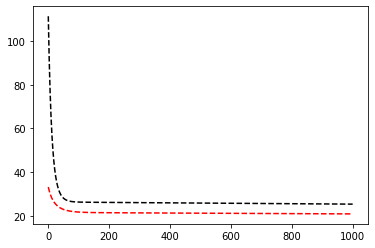

In [19]:
w = [1.0, 0.25, 0.1, 0.1]  # coeficientes iniciales
mu = 0.00000005

sse_fit, sse_test = SSE(w)
history_sse_fit = [sse_fit]
history_sse_test = [sse_test]

for epoch in range(1000):
    w = mejora(w, mu)
    sse_fit, sse_test = SSE(w)
    history_sse_fit.append(sse_fit)
    history_sse_test.append(sse_test)

y_real = np.apply_along_axis(g_(w), 1, X_real)

plt.plot(history_sse_fit, "--k")
plt.plot(history_sse_test, "--r")
plt.show()

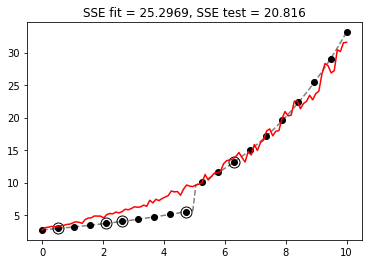

In [20]:
plt.plot(X_real[:, 0], d_real, "--", color="gray")
plt.plot(X_data[:, 0], d_data, "o", color="black")
plt.plot(X_test[:, 0], d_test, "o", color="black", fillstyle="none", markersize=11)
plt.plot(X_real[:, 0], y_real, color="red")
plt.title('SSE fit = {}, SSE test = {}'.format(round(SSE(w)[0], 4), round(SSE(w)[1], 4)))
plt.show()

In [21]:
w

array([0.99490325, 0.23629751, 0.09373265, 0.09584495])

## Ridge regression

### Función de pérdida penalizada

$$\text{P}(w) = \sum_p [d_p - g(\mathbf{x}_p)]^2 + \lambda \sum_m w_m^2$$

### Gradiente de la función de pérdida

$$
\begin{split}
 \frac{\partial}{\partial w}\text{P}(w) 
   & = \sum_p -2 \cdot e_p \frac{\partial}{\partial \mathbf{w}} g(\mathbf{x}_p) + \sum_m 2 \lambda w_m
\end{split}
$$

In [22]:
def gPen(w):
    return np.array([2 * u for u in w])

In [23]:
def mejora_ridge(w, mu, lamb):
    grd_SSE = gSSE(w)
    grd_pen = gPen(w)
    w = w - mu * (grd_SSE + lamb * grd_pen)
    return w

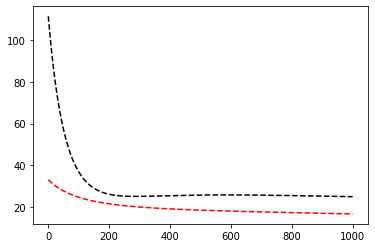

In [24]:
w = [1.0, 0.25, 0.1, 0.1]  # coeficientes iniciales
mu = 0.00000001
lamb = 2500

sse_fit, sse_test = SSE(w)
history_sse_fit = [sse_fit]
history_sse_test = [sse_test]

for epoch in range(1000):
    w = mejora_ridge(w, mu, lamb)
    sse_fit, sse_test = SSE(w)
    history_sse_fit.append(sse_fit)
    history_sse_test.append(sse_test)

y_real = np.apply_along_axis(g_(w), 1, X_real)

plt.plot(history_sse_fit, "--k")
plt.plot(history_sse_test, "--r")
plt.show()

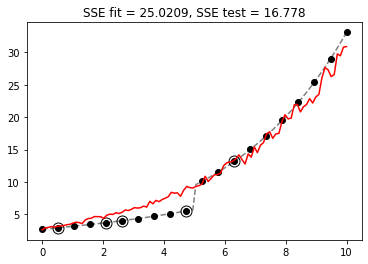

In [25]:
plt.plot(X_real[:, 0], d_real, "--", color="gray")
plt.plot(X_data[:, 0], d_data, "o", color="black")
plt.plot(X_test[:, 0], d_test, "o", color="black", fillstyle="none", markersize=11)
plt.plot(X_real[:, 0], y_real, color="red")
plt.title('SSE fit = {}, SSE test = {}'.format(round(SSE(w)[0], 4), round(SSE(w)[1], 4)))
plt.show()

In [26]:
w

array([0.95071139, 0.23861271, 0.09416578, 0.09459402])

**Ejercicio.---** Cómpute el valor óptimo de la penalización.